LOADING THE DATASET

loading the dataset from the google drive. here i use AIQ.csv in nasdaq "https://www.kaggle.com/datasets/paultimothymooney/stock-market-data"

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Load the dataset
aiq_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment3/AIQ.csv')
aiq_data

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,16-05-2018,15.010000,15.040000,6200,15.060000,15.036000,14.726511
1,17-05-2018,15.010000,15.020000,57100,15.180000,15.100000,14.789196
2,18-05-2018,14.950000,15.030000,47500,15.045000,14.984000,14.675583
3,21-05-2018,14.930000,15.100000,31100,15.105000,15.015000,14.705945
4,22-05-2018,14.950000,15.110000,27500,15.110000,14.950000,14.642282
...,...,...,...,...,...,...,...
1148,06-12-2022,20.750000,21.260000,8600,21.260000,20.799999,20.799999
1149,07-12-2022,20.615000,20.615000,7100,20.840000,20.764999,20.764999
1150,08-12-2022,20.895000,20.910000,12100,21.219999,21.090000,21.090000
1151,09-12-2022,21.150000,21.150000,17400,21.420000,21.150000,21.150000


PREPROCESSING

checking the missing values. since there is none, no action is required.

In [38]:
# Check for empty (NaN) values in the dataset
missing_values = aiq_data.isnull().sum()
print(missing_values)

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64


In [39]:
# Convert 'Date' column to datetime format
aiq_data['Date'] = pd.to_datetime(aiq_data['Date'], format='%d-%m-%Y')

# Sort dataset by 'Date' in ascending order
aiq_data = aiq_data.sort_values(by='Date').reset_index(drop=True)

# Normalize numerical columns: 'Low', 'Open', 'High', 'Close', 'Volume', 'Adjusted Close'
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_normalize = ['Low', 'Open', 'High', 'Close', 'Volume', 'Adjusted Close']
aiq_data[columns_to_normalize] = scaler.fit_transform(aiq_data[columns_to_normalize])

# Display the preprocessed dataset
aiq_data.head()


,Date,Low,Open,Volume,High,Close,Adjusted Close
0,2018-05-16,0.134864,0.134307,0.009972,0.123869,0.131765,0.128141
1,2018-05-17,0.134864,0.133365,0.100605,0.129586,0.134788,0.131081
2,2018-05-18,0.131994,0.133836,0.083511,0.123154,0.129310,0.125753
3,2018-05-21,0.131038,0.137135,0.054309,0.126012,0.130774,0.127177
4,2018-05-22,0.131994,0.137606,0.047899,0.126251,0.127704,0.124191


EDA

Summary Statistics, Histograms, Correlation Heatmap, Time-Series Line Plot, Pairplot

In [40]:
# 1. Statistical Summary
print("Statistical Summary:")
print(aiq_data.describe())

Statistical Summary:
                                Date          Low         Open       Volume  \
count                           1153  1153.000000  1153.000000  1153.000000   
mean   2020-08-29 03:57:17.640936448     0.438977     0.441356     0.052777   
min              2018-05-16 00:00:00     0.000000     0.000000     0.000000   
25%              2019-07-10 00:00:00     0.176471     0.180961     0.016560   
50%              2020-08-28 00:00:00     0.394118     0.395853     0.031517   
75%              2021-10-20 00:00:00     0.705882     0.707917     0.055556   
max              2022-12-12 00:00:00     1.000000     1.000000     1.000000   
std                              NaN     0.281169     0.279237     0.082670   

              High        Close  Adjusted Close  
count  1153.000000  1153.000000     1153.000000  
mean      0.440872     0.439313        0.440668  
min       0.000000     0.000000        0.000000  
25%       0.173082     0.177765        0.177603  
50%       0.39723

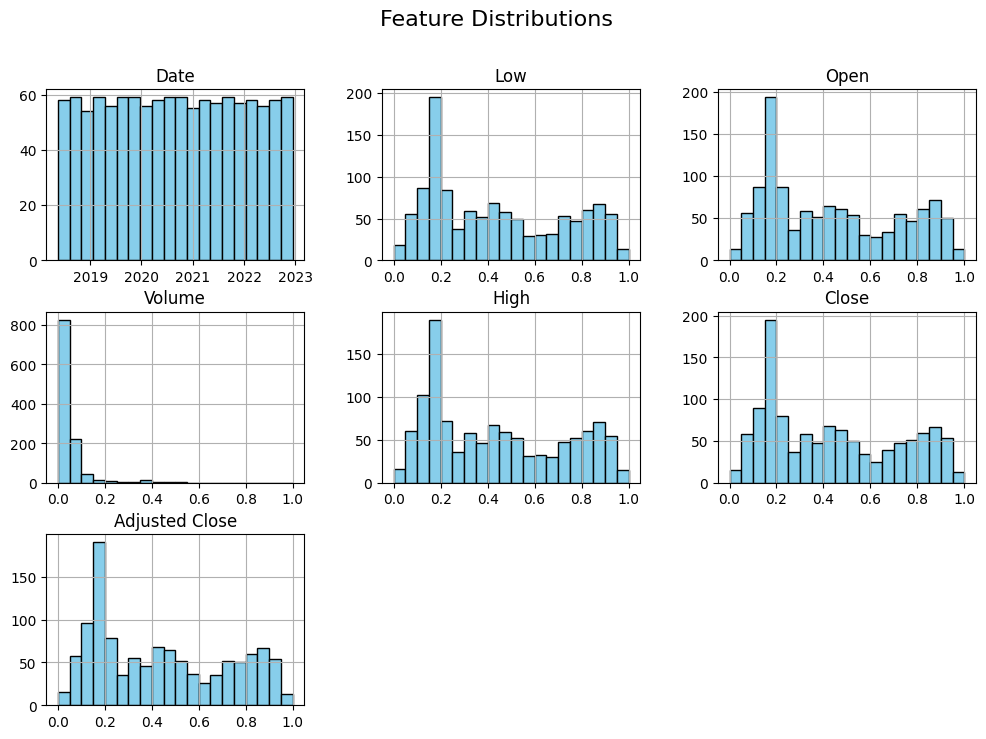

In [41]:
# 2. Data Distribution
# Plot histograms for each numerical column
aiq_data.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

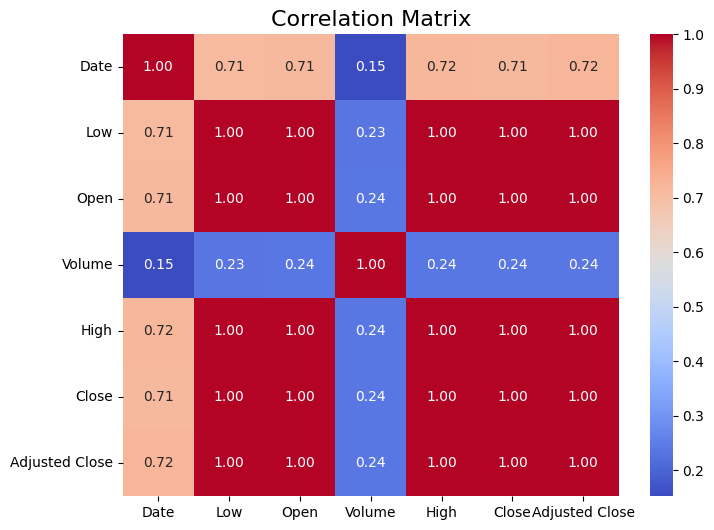

In [42]:
# 3. Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(aiq_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

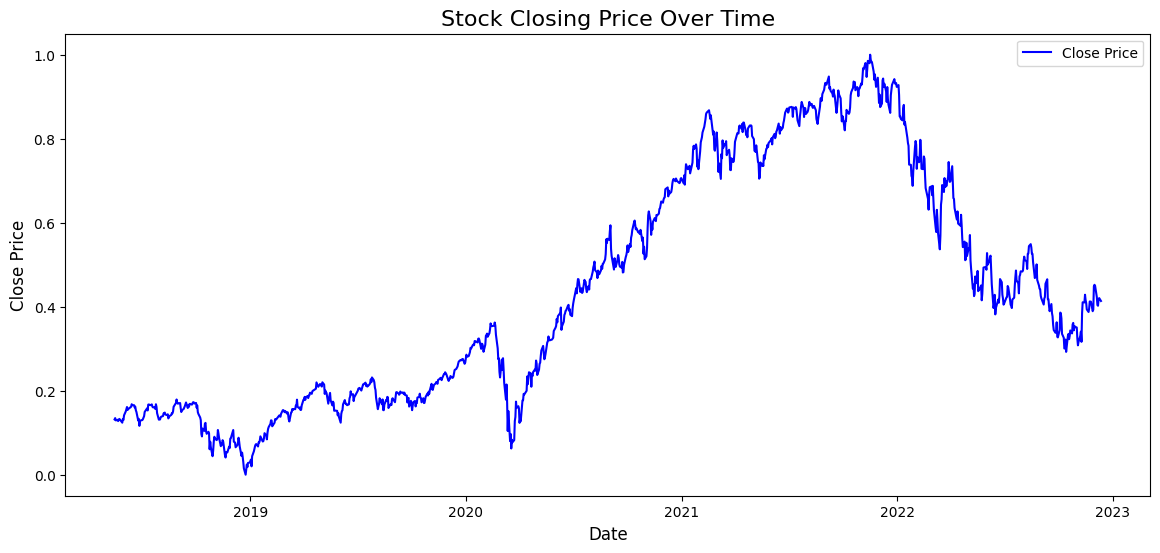

In [43]:
# 4. Time-Series Visualization
plt.figure(figsize=(14, 6))
plt.plot(aiq_data['Date'], aiq_data['Close'], label='Close Price', color='blue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.title('Stock Closing Price Over Time', fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

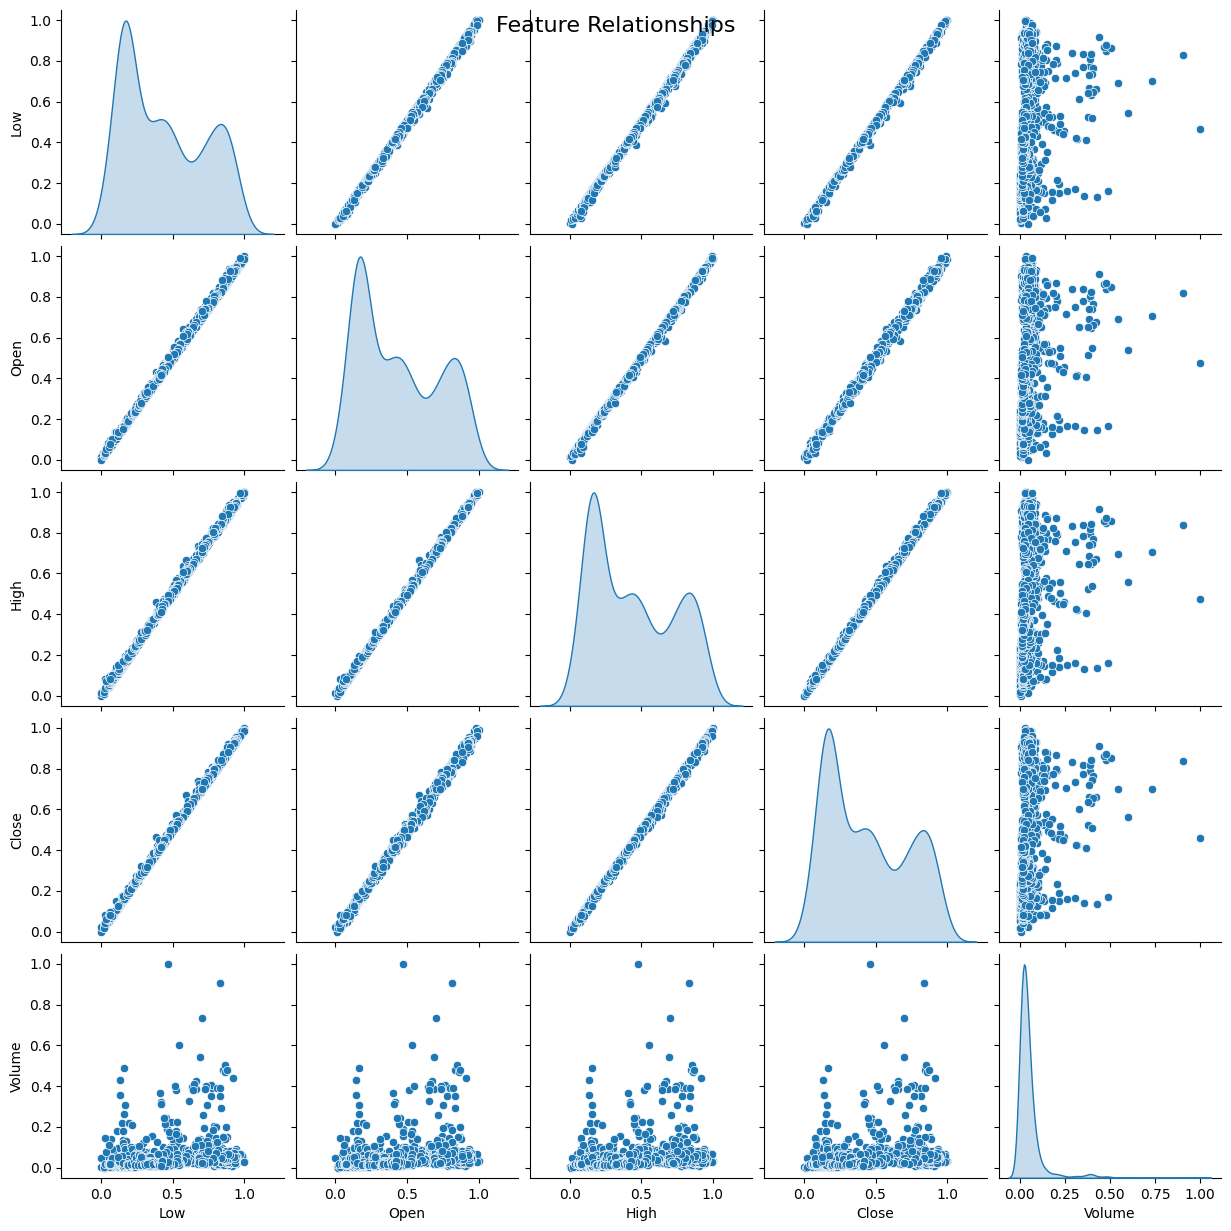

In [44]:
# 5. Pairplot (Optional: Visualize relationships between features)
sns.pairplot(aiq_data[["Low", "Open", "High", "Close", "Volume"]], diag_kind='kde', palette='husl')
plt.suptitle("Feature Relationships", fontsize=16)
plt.show()

METHODS

Spitting the dataset as train and test data set.

In [45]:
# Feature columns and target
features = ['Low', 'Open', 'High', 'Volume']
target = 'Close'

# Scale data
scaler = MinMaxScaler()
aiq_scaled = scaler.fit_transform(aiq_data[features + [target]])

# Convert scaled data back to DataFrame for easier handling
aiq_scaled = pd.DataFrame(aiq_scaled, columns=features + [target])

# Create sliding windows
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length, :-1])  # Features
        y.append(data[i+sequence_length, -1])    # Target (next Close value)
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(aiq_scaled.values, sequence_length)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Print shapes
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (800, 10, 4), X_test: (343, 10, 4)
y_train: (800,), y_test: (343,)


Simple RNN, LSTM, GRU


In [46]:
# Function to build a model
def build_model(architecture='RNN', input_shape=(sequence_length, len(features))):
    model = Sequential()
    if architecture == 'RNN':
        model.add(SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=input_shape))
    elif architecture == 'LSTM':
        model.add(LSTM(50, activation='tanh', return_sequences=False, input_shape=input_shape))
    elif architecture == 'GRU':
        model.add(GRU(50, activation='tanh', return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [47]:
# Build models
rnn_model = build_model(architecture='RNN')
lstm_model = build_model(architecture='LSTM')
gru_model = build_model(architecture='GRU')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
batch_size = 32
epochs = 100

# Train Simple RNN
rnn_history = rnn_model.fit(X_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=epochs, verbose=1)

# Train LSTM
lstm_history = lstm_model.fit(X_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=epochs, verbose=1)

# Train GRU
gru_history = gru_model.fit(X_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0371 - mae: 0.1443 - val_loss: 0.0041 - val_mae: 0.0458
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033 - mae: 0.0442 - val_loss: 0.0047 - val_mae: 0.0582
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - mae: 0.0277 - val_loss: 0.0035 - val_mae: 0.0506
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.0131e-04 - mae: 0.0201 - val_loss: 0.0031 - val_mae: 0.0487
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3282e-04 - mae: 0.0177 - val_loss: 0.0028 - val_mae: 0.0477
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.9371e-04 - mae: 0.0155 - val_loss: 0.0027 - val_mae: 0.0466
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6070e-04 - mae: 0.0153 - val_loss: 0.0032 - val_mae: 0.0516
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3031e-04 - mae: 0.0155 - val_loss: 0.0024 - val_mae: 0.0444
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s

MODEL EVALUATION:

using Rmse and R2

In [49]:
# Function to calculate RMSE and R²
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# Evaluate Simple RNN
rnn_predictions = rnn_model.predict(X_test)
rnn_rmse, rnn_r2 = evaluate_model(y_test, rnn_predictions)

# Evaluate LSTM
lstm_predictions = lstm_model.predict(X_test)
lstm_rmse, lstm_r2 = evaluate_model(y_test, lstm_predictions)

# Evaluate GRU
gru_predictions = gru_model.predict(X_test)
gru_rmse, gru_r2 = evaluate_model(y_test, gru_predictions)

# Print evaluation metrics
print(f"RNN RMSE: {rnn_rmse:.4f}, R²: {rnn_r2:.4f}")
print(f"LSTM RMSE: {lstm_rmse:.4f}, R²: {lstm_r2:.4f}")
print(f"GRU RMSE: {gru_rmse:.4f}, R²: {gru_r2:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
RNN RMSE: 0.0303, R²: 0.9810
LSTM RMSE: 0.0297, R²: 0.9818
GRU RMSE: 0.0266, R²: 0.9853


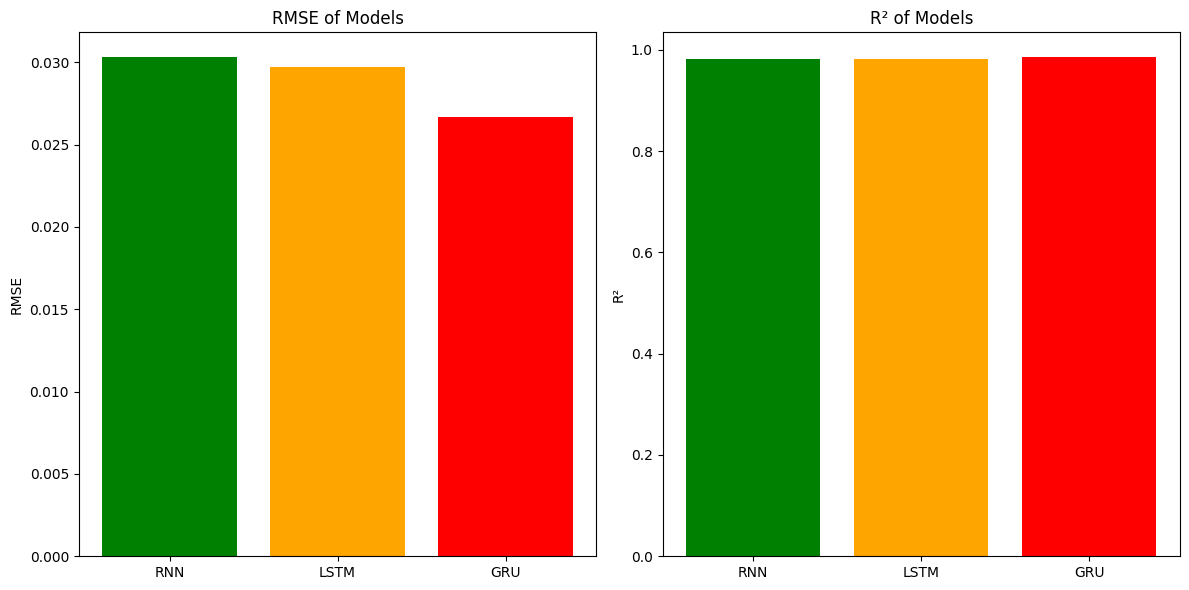

In [50]:
# Store results for visualization
model_names = ['RNN', 'LSTM', 'GRU']
rmse_values = [rnn_rmse, lstm_rmse, gru_rmse]
r2_values = [rnn_r2, lstm_r2, gru_r2]

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(model_names, rmse_values, color=['green', 'orange', 'red'])
plt.title('RMSE of Models')
plt.ylabel('RMSE')

# Plot R²
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color=['green', 'orange', 'red'])
plt.title('R² of Models')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


MODEL PREDICTION

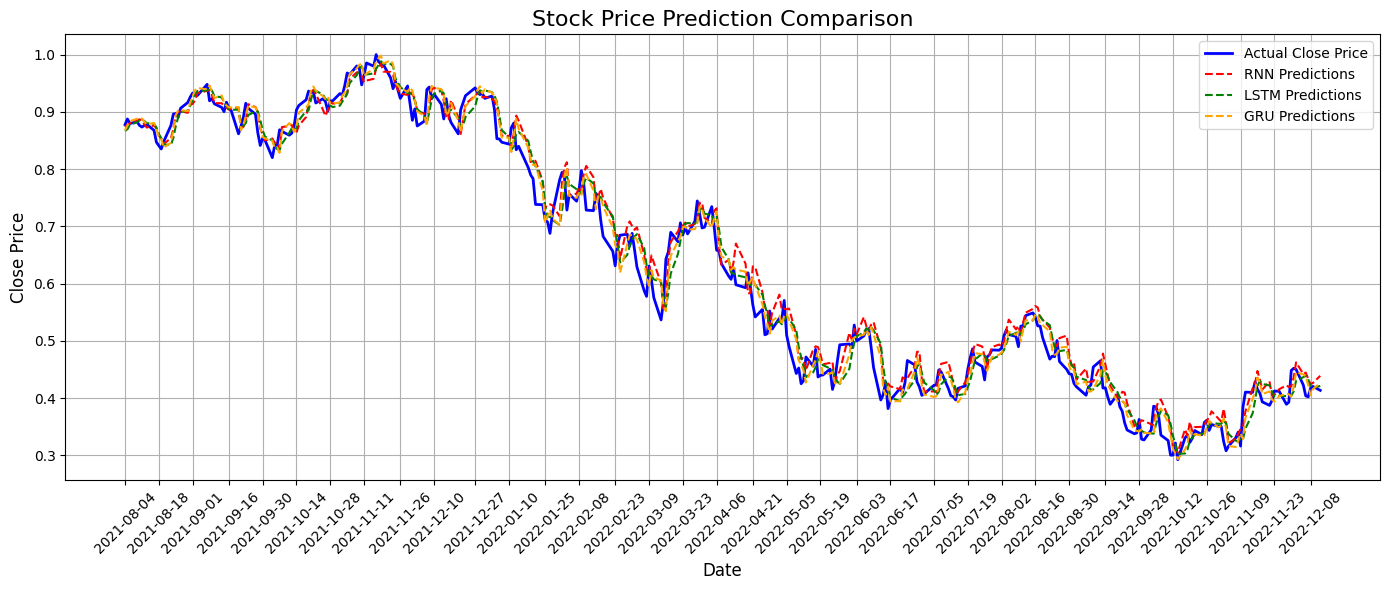

In [59]:
# Extract Date from the original dataset for the test set
date_test = aiq_data['Date'].iloc[-len(y_test):]  # Get the dates for the test set

# Plotting
plt.figure(figsize=(14, 6))

# Actual vs Predictions for each model
plt.plot(date_test, y_test_inverse, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(date_test, rnn_predictions_inverse, label='RNN Predictions', color='red', linestyle='dashed')
plt.plot(date_test, lstm_predictions_inverse, label='LSTM Predictions', color='green', linestyle='dashed')
plt.plot(date_test, gru_predictions_inverse, label='GRU Predictions', color='orange', linestyle='dashed')

# Formatting the plot
plt.title('Stock Price Prediction Comparison', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.xticks(date_test[::10], rotation=45)  # Show every 10th date and rotate for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
